### Manifold Learning
- mulidimensional scaling(MDS)
- locally linear embedding(LLE)
- isometric mapping(Isomap) 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis("off")
    ax.text(0.5, 0.4, "HELLO", va="center", ha="center", weight="bold", size=85)
    fig.savefig("data/hello.png")
    plt.close(fig)

    from matplotlib.image import imread
    data = imread("data/hello.png")[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

(-0.19972965643412033,
 4.195346643588747,
 0.02244321091604335,
 0.990457146590137)

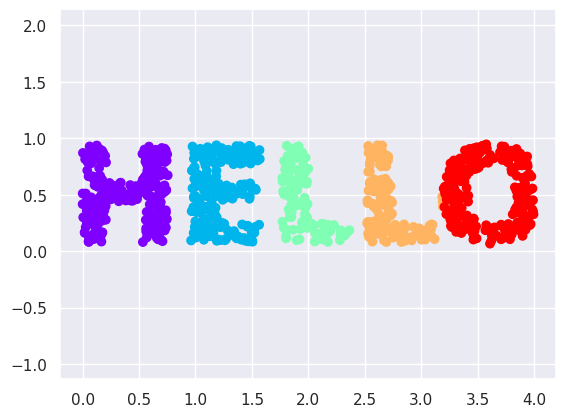

In [3]:
X = make_hello(1000)
colorize = {"c": X[:, 0], "cmap": plt.get_cmap("rainbow", 5)}
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis("equal")

#### Mutidimensional Scaling(MDS)

(4.507487053249943, 8.845503039218586, 4.991879306174322, 7.269254509788998)

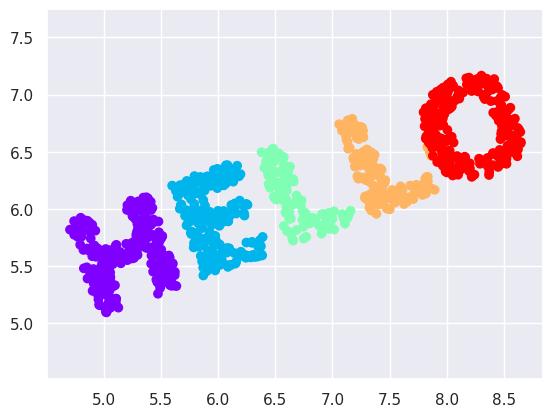

In [4]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis("equal")

In [5]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

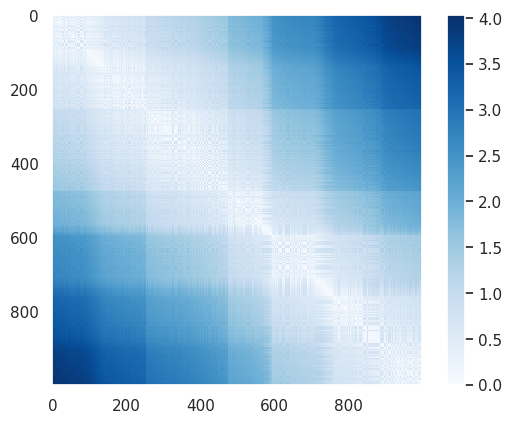

In [6]:
plt.imshow(D, zorder=2, cmap="Blues", interpolation="nearest")
plt.colorbar()

In [7]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0314683289212114,
 2.139050090753283,
 -1.3432561900442945,
 1.3682556159800603)

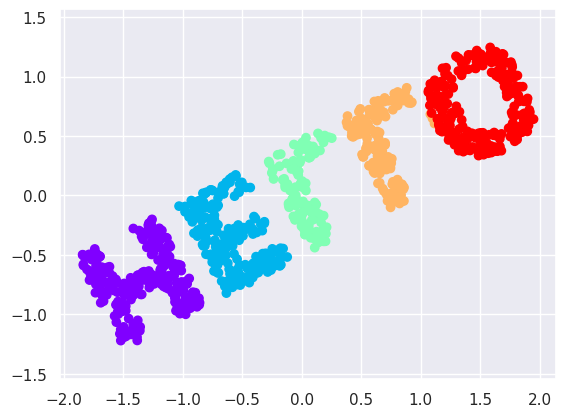

In [8]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis("equal")

In [9]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) # 3 * 3
    e, V =np.linalg.eigh(np.dot(C, C.T)) # e: 3, V: 3 * 3
    return np.dot(X, V[:X.shape[1]]) # X: 1000 * 2, V: 3 * 3 -> 1000 * 3 

X3 = random_projection(X, 3)
X3.shape

(1000, 3)

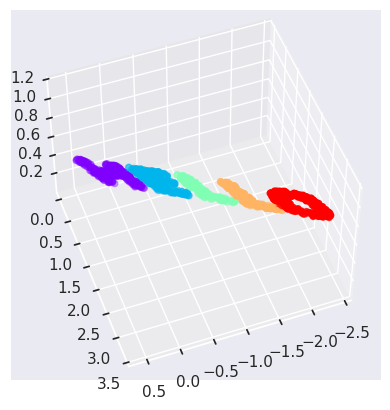

In [10]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection="3d")
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0314683289212114,
 2.1390500907532832,
 -1.3432561900442952,
 1.3682556159800632)

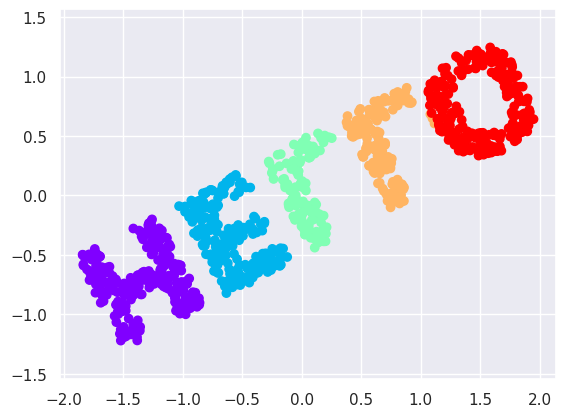

In [11]:
# 給一個高維度的內嵌資料，尋找出可以保留資料裡面關係資訊的低維度表示法
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis("equal")

#### Nonlinear Embedding

In [12]:
def make_hello_s_curve(X):
    t = (X[:, 0] -2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1) # np.sign: -1 if x < 0, 0 if x==0, 1 if x > 0
    return np.vstack((x, y, z)).T

In [13]:
XS = make_hello_s_curve(X)

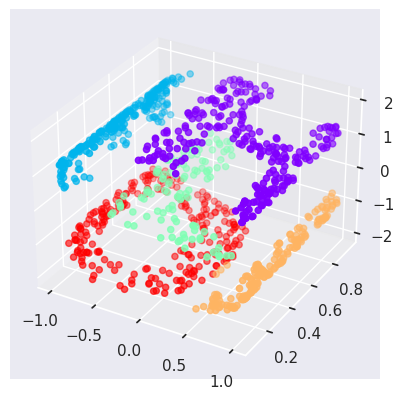

In [14]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection="3d")
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.7542649693704555,
 1.7171533174441027,
 -2.253133416776031,
 2.0016781872998273)

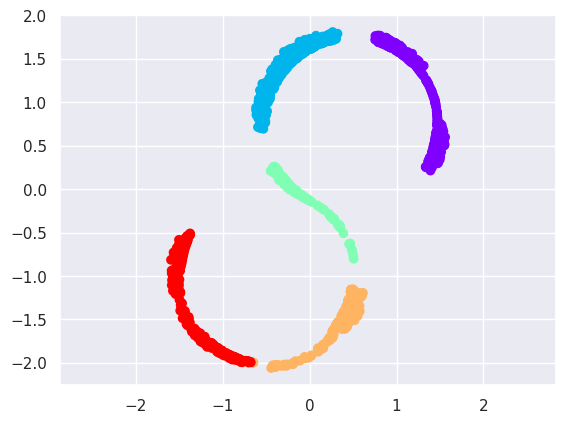

In [16]:
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis("equal")

#### Locally Linear Embedding
不同於保留資料集中每一對資料點之間的距離(MDS)，LLE只保留資料點跟鄰接點的距離

(0.15, -0.15)

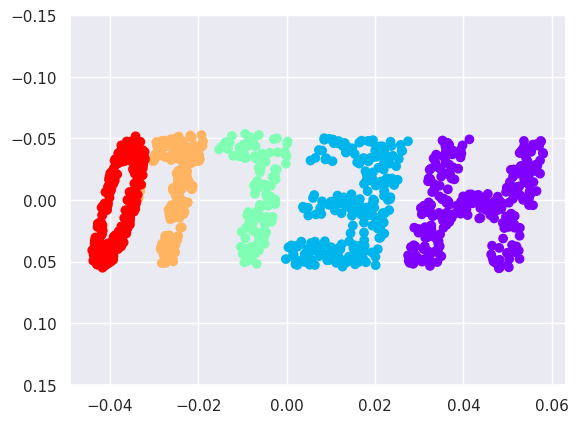

In [17]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method="modified",
                               eigen_solver="dense")
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

reference: https://scikit-learn.org/stable/modules/manifold.html

#### Isomap

In [18]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

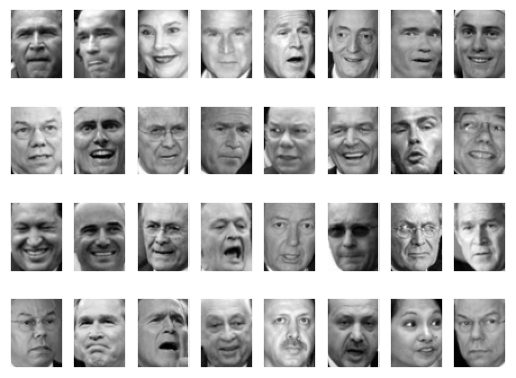

In [19]:
fig, ax = plt.subplots(4, 8, subplot_kw={"xticks": [], "yticks": []})
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gray")

Text(0, 0.5, 'cumulative variance')

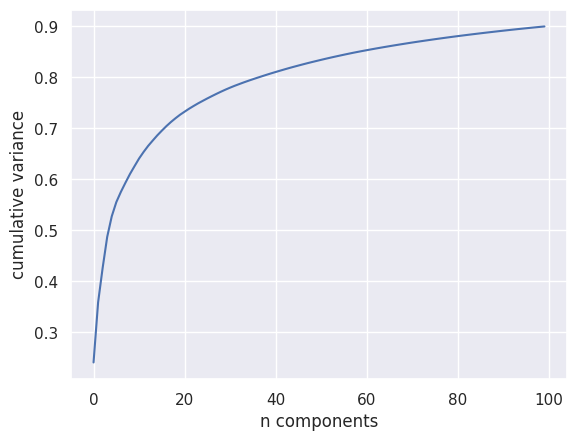

In [20]:
from sklearn.decomposition import PCA
model = PCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel("n components")
plt.ylabel("cumulative variance")

In [21]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [22]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap="gray"):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], ".k")

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                continue # 不顯示太過接近的點
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap),
                                                proj[i])
            ax.add_artist(imagebox)

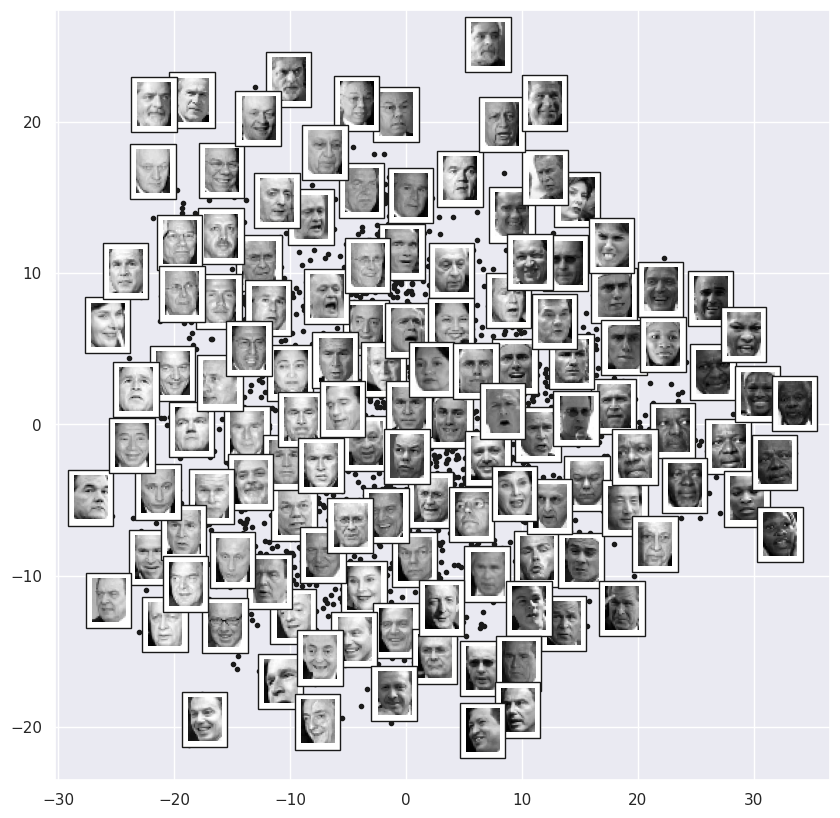

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

In [36]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.data.shape

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

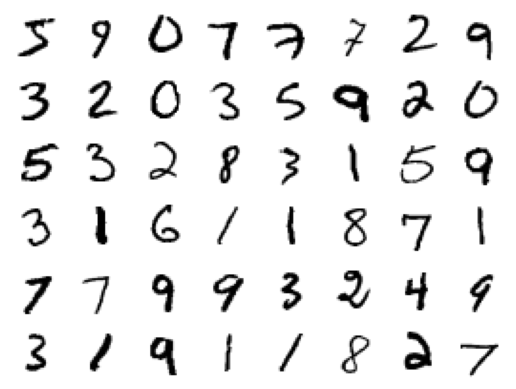

In [37]:
fig, ax = plt.subplots(6, 8, subplot_kw={"xticks": [], "yticks": []})
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap="gray_r")

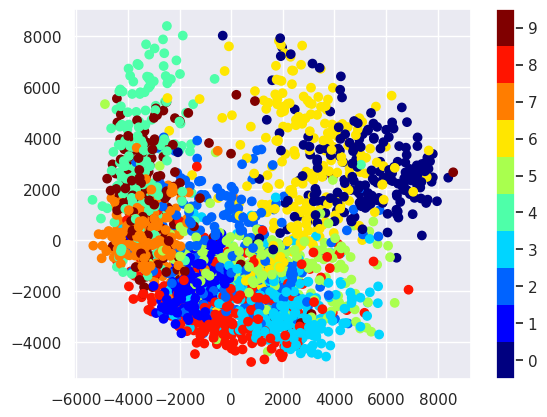

In [40]:
data = mnist.data[::30]
target = mnist.target[::30].astype(int)

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

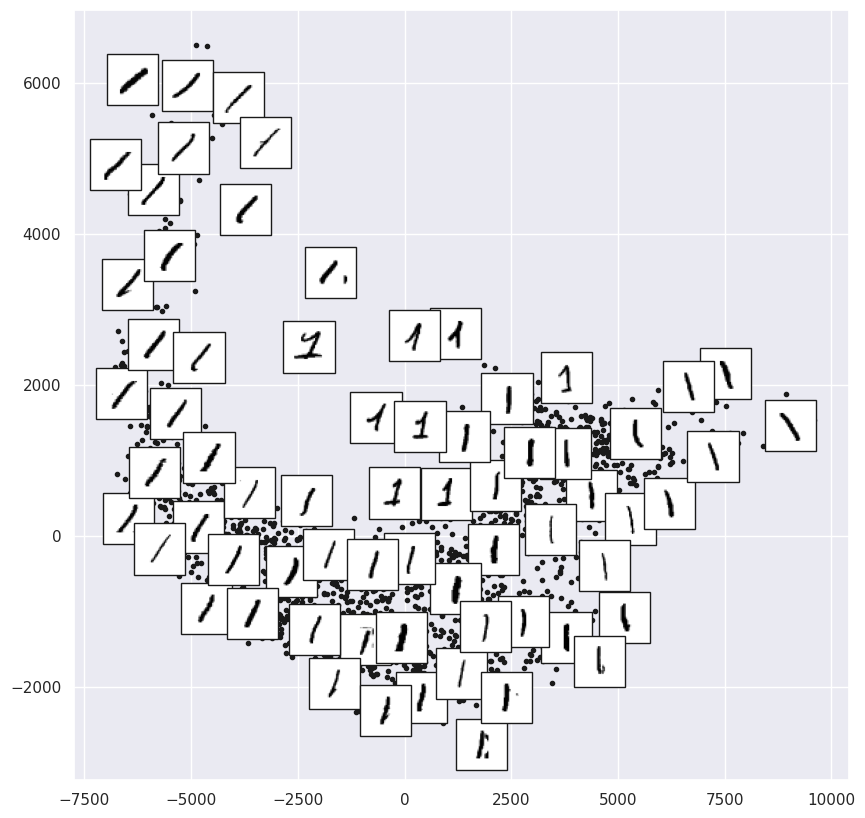

In [42]:
# choose 1/4 of the `1` digits to project
data = mnist.data[mnist.target == "1"][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver="dense")
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap="gray_r")